# Motivational Quote Generator — Generative AI (Markov Chain)
Created for: Muhammad Dawood Hussain  
Roll No: 23PWDSC0121  
Dept: CS & IT, UET Peshawar  

This notebook contains a step-by-step implementation of a simple generative text model using a Markov Chain (bigram) trained on a small motivational quotes dataset. It includes preprocessing, training, generation, evaluation, visualization, and saving outputs.

## 1. Install & Import Libraries
Run the cell below to import required Python libraries. If running locally, make sure the packages are installed (`pandas`, `scikit-learn`, `matplotlib`).

In [1]:
import pandas as pd
import random
import re
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print('Libraries imported successfully')

Libraries imported successfully


## 2. Create Dataset
We create a small dataset of inspirational motivational quotes. You can expand this list later for better results.

In [2]:
data = {
    'quote': [
        'Believe in yourself and all that you are.',
        'Every moment is a fresh beginning.',
        'Success is not final, failure is not fatal.',
        'Dream big and dare to fail.',
        'Act as if what you do makes a difference.',
        'Hard work beats talent when talent doesn\'t work hard.',
        'Don\'t stop when you\'re tired. Stop when you\'re done.',
        'Great things never come from comfort zones.',
        'Push yourself, because no one else is going to do it for you.',
        'Your limitation—it’s only your imagination.'
    ]
}

df = pd.DataFrame(data)
df.head()

,quote
0,Believe in yourself and all that you are.
1,Every moment is a fresh beginning.
2,"Success is not final, failure is not fatal."
3,Dream big and dare to fail.
4,Act as if what you do makes a difference.


## 3. Preprocessing
Lowercase the text and remove punctuation for consistent tokenization.

In [3]:
def clean_text(text):
    text = text.lower()
    # remove punctuation except apostrophes (optional) and normalize em-dash and special quotes
    text = re.sub(r'[–—]', '-', text)
    text = re.sub(r'[^\w\s\-\']', '', text)
    text = text.replace('\u2019', "'")
    text = text.strip()
    return text

# Apply cleaning

df['cleaned'] = df['quote'].apply(clean_text)
df[['quote','cleaned']]


,quote,cleaned
0,Believe in yourself and all that you are.,believe in yourself and all that you are
1,Every moment is a fresh beginning.,every moment is a fresh beginning
2,"Success is not final, failure is not fatal.",success is not final failure is not fatal
3,Dream big and dare to fail.,dream big and dare to fail
4,Act as if what you do makes a difference.,act as if what you do makes a difference
5,Hard work beats talent when talent doesn't wor...,hard work beats talent when talent doesn't wor...
6,Don't stop when you're tired. Stop when you're...,don't stop when you're tired stop when you're ...
7,Great things never come from comfort zones.,great things never come from comfort zones
8,"Push yourself, because no one else is going to...",push yourself because no one else is going to ...
9,Your limitation—it’s only your imagination.,your limitation-its only your imagination


## 4. Train-Test Split
Split the cleaned dataset into training and testing sets to evaluate vocabulary coverage.

In [4]:
train_df, test_df = train_test_split(df['cleaned'], test_size=0.2, random_state=42)
print('Training examples:', len(train_df))
print('Testing examples:', len(test_df))
train_df.tolist(), test_df.tolist()

Training examples: 8
Testing examples: 2


(["hard work beats talent when talent doesn't work hard",
  'believe in yourself and all that you are',
  'great things never come from comfort zones',
  'success is not final failure is not fatal',
  'your limitation-its only your imagination',
  'act as if what you do makes a difference',
  'dream big and dare to fail',
  "don't stop when you're tired stop when you're done"],
 ['push yourself because no one else is going to do it for you',
  'every moment is a fresh beginning'])

## 5. Build Markov Chain (Bigram Model)
We create a dictionary mapping each word to a list of possible following words (transitions).

In [5]:
# Build bigram Markov chain
markov_chain = defaultdict(list)

for sentence in train_df:
    words = sentence.split()
    for i in range(len(words)-1):
        markov_chain[words[i]].append(words[i+1])

# Show some transitions
list(markov_chain.items())[:10]

[('hard', ['work']),
 ('work', ['beats', 'hard']),
 ('beats', ['talent']),
 ('talent', ['when', "doesn't"]),
 ('when', ['talent', "you're", "you're"]),
 ("doesn't", ['work']),
 ('believe', ['in']),
 ('in', ['yourself']),
 ('yourself', ['and']),
 ('and', ['all', 'dare'])]

## 6. Generate Sentences
Function to generate sentences from the Markov Chain. You can pass a start word or let it pick randomly.

In [6]:
def generate_sentence(start_word=None, length=12):
    if not start_word:
        start_word = random.choice(list(markov_chain.keys()))
    word = start_word.lower()
    sentence = [word]
    for _ in range(length-1):
        if word in markov_chain and markov_chain[word]:
            word = random.choice(markov_chain[word])
            sentence.append(word)
        else:
            break
    # Capitalize first word and join
    return ' '.join(sentence).capitalize() + '.'

# Generate examples
for i in range(8):
    print(generate_sentence())

From comfort zones.
Your limitation-its only your limitation-its only your imagination.
Never come from comfort zones.
Act as if what you do makes a difference.
Limitation-its only your limitation-its only your limitation-its only your limitation-its only your.
Beats talent when talent when you're tired stop when you're tired stop.
A difference.
Big and dare to fail.


## 7. Evaluation
A simple evaluation: what percentage of words in the test set are present in the Markov chain vocabulary?

In [7]:
test_words = ' '.join(test_df).split()
known_words = [w for w in test_words if w in markov_chain]
evaluation_score = len(known_words) / len(test_words) * 100 if test_words else 0
print(f'Known words in model from test set: {len(known_words)}/{len(test_words)} ({evaluation_score:.2f}%)')

print('\nWords in test set not seen in training:')
unknown = sorted(set([w for w in test_words if w not in markov_chain]))
unknown[:20]

Known words in model from test set: 7/19 (36.84%)

Words in test set not seen in training:


['because',
 'beginning',
 'else',
 'every',
 'for',
 'fresh',
 'going',
 'it',
 'moment',
 'no',
 'one',
 'push']

## 8. Visualization
Plot the top 10 most common words in the entire dataset to understand token distribution.

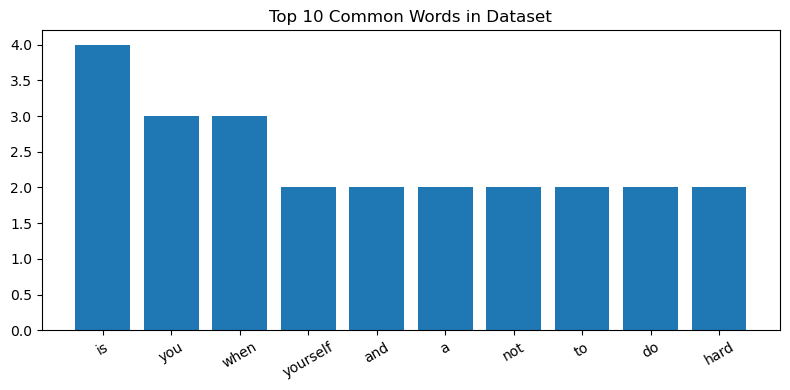

In [8]:
all_words = ' '.join(df['cleaned']).split()
word_counts = Counter(all_words).most_common(10)
words, counts = zip(*word_counts)

plt.figure(figsize=(8,4))
plt.bar(words, counts)
plt.title('Top 10 Common Words in Dataset')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## 9. Save Model & Generated Samples
We save generated examples and the Markov chain (as a simple dictionary) to files for later use.

In [9]:
import json

# Save generated quotes
samples = [generate_sentence(length=10) for _ in range(20)]
with open('generated_quotes.txt', 'w', encoding='utf-8') as f:
    for s in samples:
        f.write(s + '\n')

# Save markov chain as json (note: lists of next words)
with open('markov_chain.json', 'w', encoding='utf-8') as f:
    json.dump(markov_chain, f, ensure_ascii=False, indent=2)

print('Saved 20 generated samples to generated_quotes.txt')
print('Saved Markov chain to markov_chain.json')

Saved 20 generated samples to generated_quotes.txt
Saved Markov chain to markov_chain.json


## 10. Next Steps / Improvements
- Increase dataset size (hundreds/thousands of quotes)
- Use trigram or higher-order Markov models
- Implement LSTM or Transformer models for more fluent text
- Deploy using Streamlit for a web interface

---

### Notes
This notebook is educational — markov chains are simple and useful for learning but have limitations for realistic text generation. For production-quality text generation, consider pretrained Transformer models.